# **Project Name**    - Classification : Airline Passenger Referral Prediction



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Sk Md Sohel Fazal

# **Project Summary -**

Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019. The main objective is to predict whether passengers will refer the airline to their friends.

# **GitHub Link -**

Colab link : https://colab.research.google.com/drive/1GiO3e6RNSodz3JkiPNM0rdwTP2eQQte8#scrollTo=gIfDvo9L0UH2

The project is individual contribution, there is no need for GitHub.

# **Problem Statement**


**Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019. The main objective is to predict whether passengers will refer the airline to their friends.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_excel("/content/drive/MyDrive/Datasets/data_airline_reviews.xlsx", engine='openpyxl')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(131895, 17)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()
df.drop_duplicates(inplace = True)
df.shape


(61184, 17)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

<BarContainer object of 17 artists>

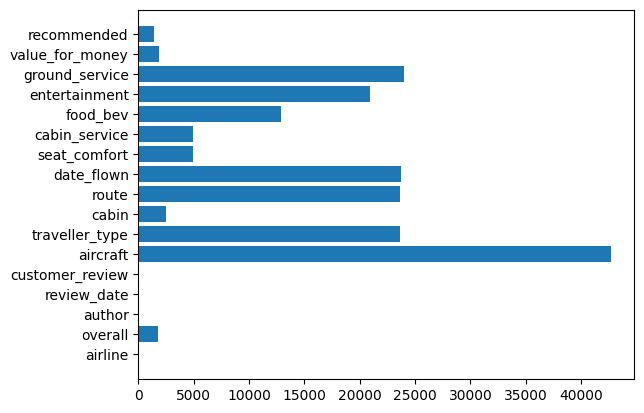

In [ ]:
# Visualizing the missing values
plt.barh(df.columns, df.isnull().sum())

In [ ]:
df.dropna(inplace = True)
df.shape

(13189, 17)

### What did you know about your dataset?

Our dataset had a lot of duplicate and null values. Initially is had about 1,30,000 rows, but after removing duplicates and null values it has 13,189 rows.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,13189.000000,13189.000000,13189.000000,13189.000000,13189.000000,13189.000000,13189.000000
mean,6.494048,3.493669,3.750246,3.329972,3.343771,3.466828,3.565092
std,3.050763,1.333998,1.417569,1.424204,1.394977,1.413375,1.402135
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000
50%,8.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,9.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [ ]:
df["aircraft"].value_counts()

aircraft
A380                               1049
Boeing 777                         1016
A330                                875
Boeing 787                          752
Boeing 777-300ER                    689
                                   ... 
Boeing 757 and Boeing 767             1
Boeing 767-400 / Boeing 737-900       1
CRJ200                                1
Boeing 767-400 / MD88 / B717          1
boeing 767                            1
Name: count, Length: 1636, dtype: int64

### Variables Description

We have 7 numerical variable:
1. overall : overall trip rating
2. seat_comfort : comfort level of seat provided
3. cabin_service : service rating
4. food_bev : food and beverages rating
5. entertainment : entertainment rating
6. ground_service : ground staff rating
7. value_for_money : value for money rating

We have 10 non-numeric variables. The important ones are:
1. airline : the company of airline
2. author : author of review
3. review_date : date of review
4. customer_review : review in form of writing/description
5. aircraft : type of aircraft
6. traveller_type : class of the travel
7. cabin : class of the seat provided
8. route : flight route from to where
9. date_flown : date of flight
10. recommended : if recommended or not

We will be treating the numerical variables along with customer_review and cabin as independent variables. Therefore, total 9 independent variables.
We will be treating the recommended column as dependent variable.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print("\nAirline : \n", df["airline"].unique())
print("\nAuthor : \n", df["author"].unique())
print("\Review_date : \n", df["review_date"].unique())
print("\Customer_review : \n", df["customer_review"].unique())
print("\Aircraft : \n", df["aircraft"].unique())
print("\Traveller_type : \n", df["traveller_type"].unique())
print("\Cabin : \n", df["cabin"].unique())
print("\Route : \n", df["route"].unique())
print("\Date flown : \n", df["date_flown"].unique())
print("\Recommended : \n", df["recommended"].unique())


Airline : 
 ['Turkish Airlines' 'Qatar Airways' 'Emirates' 'Lufthansa'
 'KLM Royal Dutch Airlines' 'Virgin America' 'American Airlines'
 'Delta Air Lines' 'Southwest Airlines' 'United Airlines'
 'Jetblue Airways' 'Aegean Airlines' 'Aeroflot Russian Airlines'
 'Aeromexico' 'Air Canada' 'Air New Zealand' 'Alitalia' 'AirAsia'
 'Asiana Airlines' 'Avianca' 'Austrian Airlines' 'British Airways'
 'Brussels Airlines' 'China Eastern Airlines' 'China Southern Airlines'
 'Copa Airlines' 'Ethiopian Airlines' 'Egyptair' 'Finnair' 'Iberia'
 'ANA All Nippon Airways' 'easyJet' 'Korean Air' 'LATAM Airlines'
 'LOT Polish Airlines' 'Qantas Airways' 'Air France' 'Etihad Airways'
 'Pegasus Airlines' 'Royal Jordanian Airlines' 'Ryanair'
 'South African Airways' 'Saudi Arabian Airlines' 'TAP Portugal'
 'Eurowings' 'EVA Air' 'Royal Air Maroc' 'Singapore Airlines'
 'SAS Scandinavian' 'Swiss Intl Air Lines' 'Thai Airways' 'Air India'
 'Air Europa' 'Air Canada rouge' 'airBaltic' 'Air China'
 'Cathay Pacific Air

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
print(df["overall"].value_counts())
print(df["seat_comfort"].value_counts())
print(df["cabin_service"].value_counts())
print(df["food_bev"].value_counts())
print(df["entertainment"].value_counts())
print(df["ground_service"].value_counts())
print(df["value_for_money"].value_counts())
print(df["recommended"].value_counts())

overall
9.0     2421
10.0    2171
8.0     2077
1.0     1414
7.0     1343
2.0      872
3.0      820
6.0      758
5.0      716
4.0      597
Name: count, dtype: int64
seat_comfort
4.0    4002
5.0    3637
3.0    2469
1.0    1684
2.0    1397
Name: count, dtype: int64
cabin_service
5.0    5830
4.0    2777
3.0    1683
1.0    1643
2.0    1256
Name: count, dtype: int64
food_bev
5.0    3540
4.0    3389
3.0    2403
1.0    2260
2.0    1597
Name: count, dtype: int64
entertainment
4.0    3602
5.0    3366
3.0    2599
1.0    2178
2.0    1444
Name: count, dtype: int64
ground_service
5.0    3943
4.0    3727
3.0    2195
1.0    2132
2.0    1192
Name: count, dtype: int64
value_for_money
5.0    4494
4.0    3484
3.0    2022
1.0    1830
2.0    1359
Name: count, dtype: int64
recommended
yes    8802
no     4387
Name: count, dtype: int64


### What all manipulations have you done and insights you found?

We have found that all overall rating is in range 1 - 10 while rest of the ratings are of range 1 - 5. Also there is a date time column called review_date. But due to the existence of this column the data is not time series data, because there is no proper continuity or fixed intervals in which the reviews are recorded.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

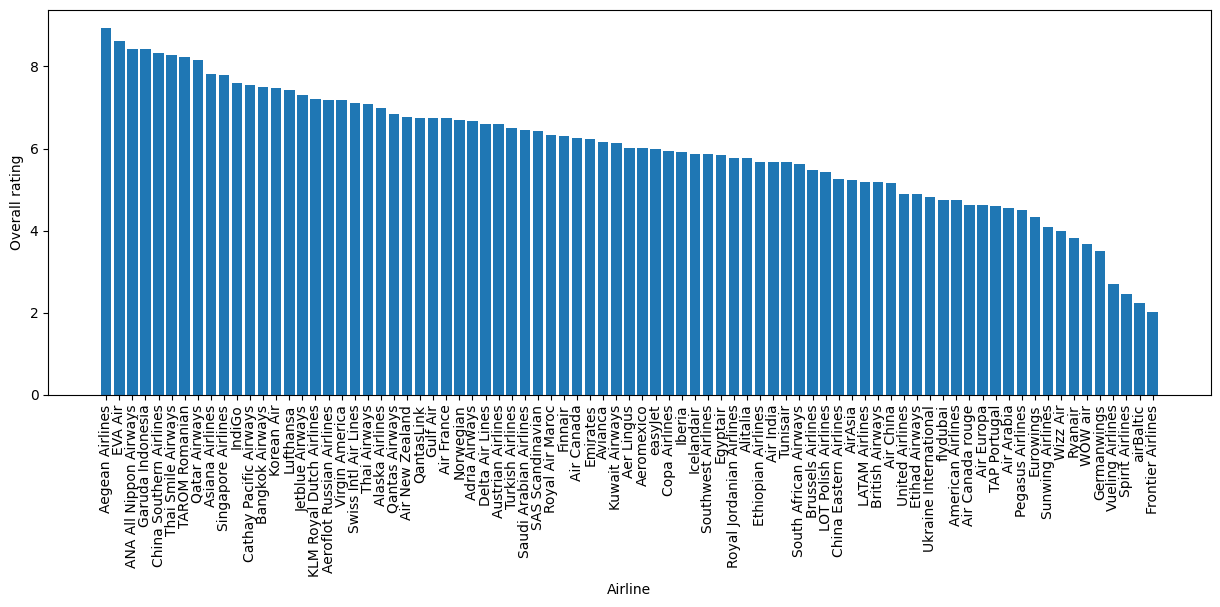

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize = (15, 5))
airline_df = df.groupby("airline")["overall"].mean().sort_values(ascending = False).reset_index()
plt.bar(airline_df["airline"], airline_df["overall"])
plt.xticks(rotation = 90)
plt.ylabel("Overall rating")
plt.xlabel("Airline")
plt.show()

##### 1. Why did you pick the specific chart?

To plot the airlines and their average overall rating into a bar graph.

##### 2. What is/are the insight(s) found from the chart?

Aegean Airlines, EVA Air and ANA All Nippon Airways are the highest rated airlines, while Spirit Airlines, airBaltic and Frontier Airlines are the lowest rated.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights tell us which airlines are most preferred and which are not.

#### Chart - 2

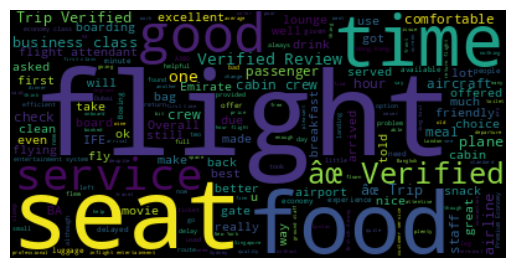

In [ ]:
# Chart - 2 visualization code
from wordcloud import WordCloud
text = df.customer_review.str.cat(sep = " ")

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

To see which words are mostly used in the customer reviews.

##### 2. What is/are the insight(s) found from the chart?

Words like food, seat, time, service are mostly used which means these are the ones customer thinks as most important.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights will help in understanding customer interest and rating subjects.

#### Chart - 3

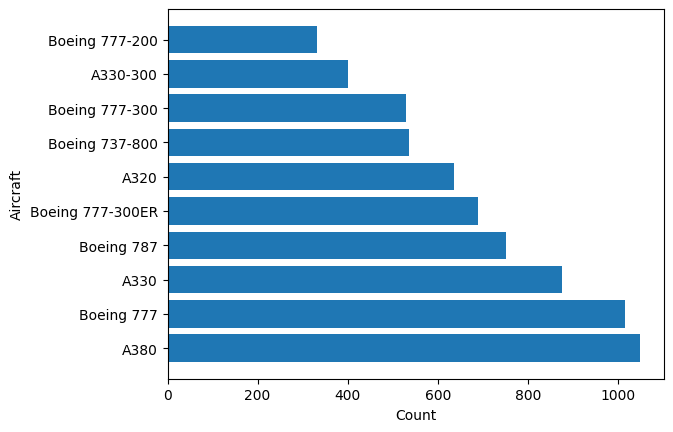

In [ ]:
# Chart - 3 visualization code
aircraft_df = df["aircraft"].value_counts()[:10].reset_index()
plt.barh(aircraft_df["aircraft"], aircraft_df["count"])
plt.xlabel("Count")
plt.ylabel("Aircraft")
plt.show()

##### 1. Why did you pick the specific chart?

Picked this specific chart to plot which aircrafts are mostly used on a bar graph.

##### 2. What is/are the insight(s) found from the chart?

A380, Boeing 777, A330 are the most used aircraft models.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights will help companies select the proper aircraft model when adding aircraft to their fleet.

#### Chart - 4

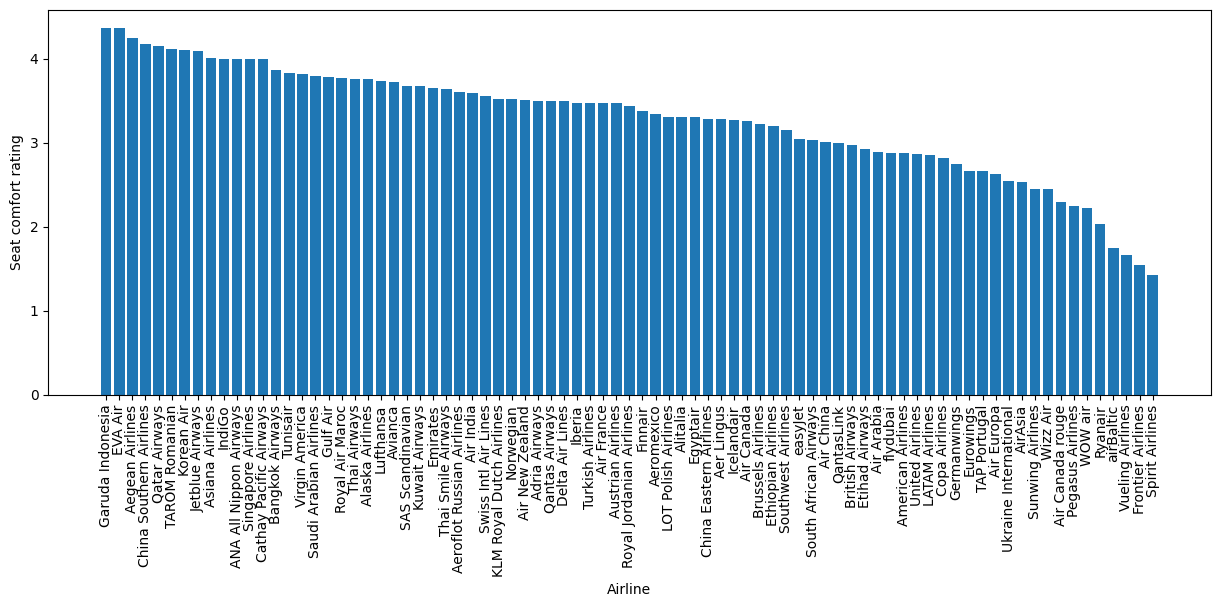

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize = (15, 5))
seat_comfort_df = df.groupby("airline")["seat_comfort"].mean().sort_values(ascending = False).reset_index()
plt.bar(seat_comfort_df["airline"], seat_comfort_df["seat_comfort"])
plt.xticks(rotation = 90)
plt.xlabel("Airline")
plt.ylabel("Seat comfort rating")
plt.show()

##### 1. Why did you pick the specific chart?

Picked this specific chart to plot which airline gives the highest and the lowest seat comfort.

##### 2. What is/are the insight(s) found from the chart?

Garuda Indonesia, EVA Air, Aegean Airlines have the most seat comfort while Spirit, Frontier and Vueling Airlines have the least seat comfort.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights may help the respective companies update their seating.

#### Chart - 5

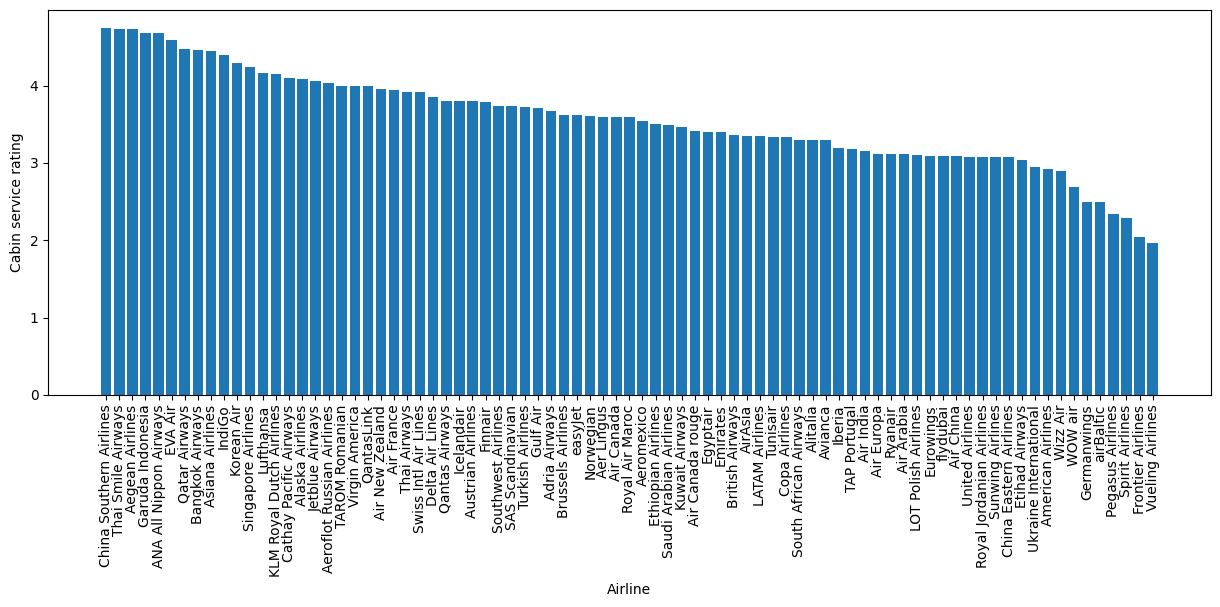

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize = (15, 5))
cabin_service_df = df.groupby("airline")["cabin_service"].mean().sort_values(ascending = False).reset_index()
plt.bar(cabin_service_df["airline"], cabin_service_df["cabin_service"])
plt.xticks(rotation = 90)
plt.ylabel("Cabin service rating")
plt.xlabel("Airline")
plt.show()

##### 1. Why did you pick the specific chart?

Picked this specific chart to plot which airline gives the highest and the lowest cabin service.

##### 2. What is/are the insight(s) found from the chart?

China Southern Airlines, Thai Smile Airways, Aegean Airlines are the ones with highest cabin service, while Spirit, Frontier and Vueling Airlines are the ones with lowest rated cabin service.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights will help the respective airlines rectify their cabin service to get more rating.

#### Chart - 6

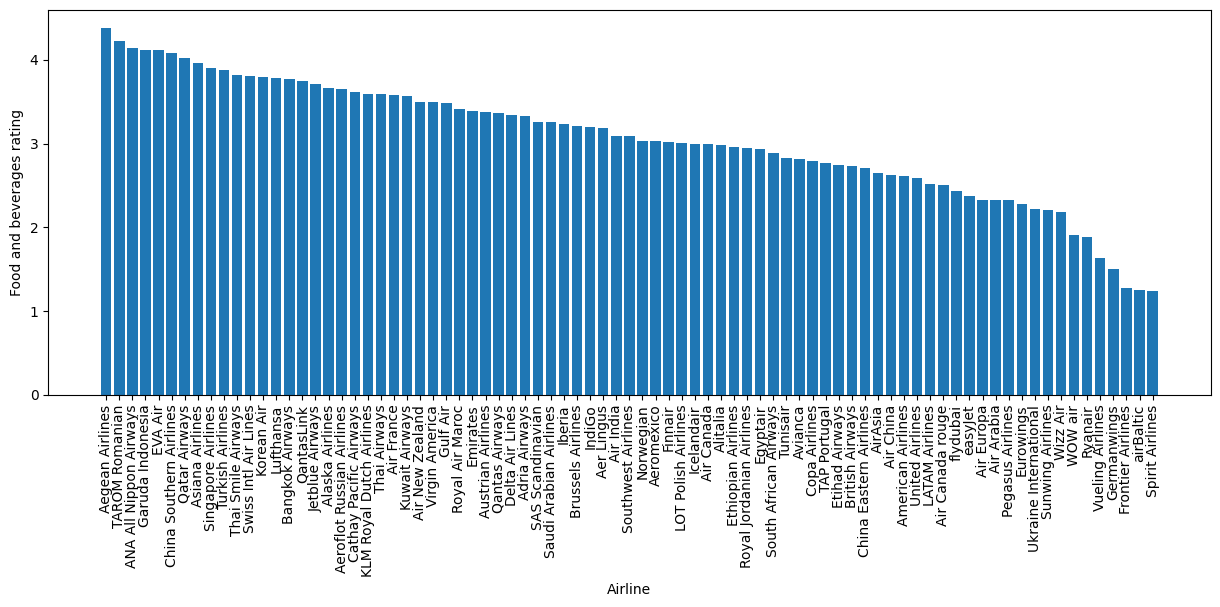

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize = (15, 5))
food_bev_df = df.groupby("airline")["food_bev"].mean().sort_values(ascending = False).reset_index()
plt.bar(food_bev_df["airline"], food_bev_df["food_bev"])
plt.xticks(rotation = 90)
plt.ylabel("Food and beverages rating")
plt.xlabel("Airline")
plt.show()


##### 1. Why did you pick the specific chart?

Picked this chart to plot which airline gives what quality of food and beverages.

##### 2. What is/are the insight(s) found from the chart?

Aegean Airlines, TAROM Romanian, ANA All Nippon Airways have the highest rated food and beverages, while Frontier, airBaltic and Spirit Airlines have the lowest rated food and beverages, on their menu.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights will help the respective airlines to upgrade their food and beverages for better rating.

#### Chart - 7

In [ ]:
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

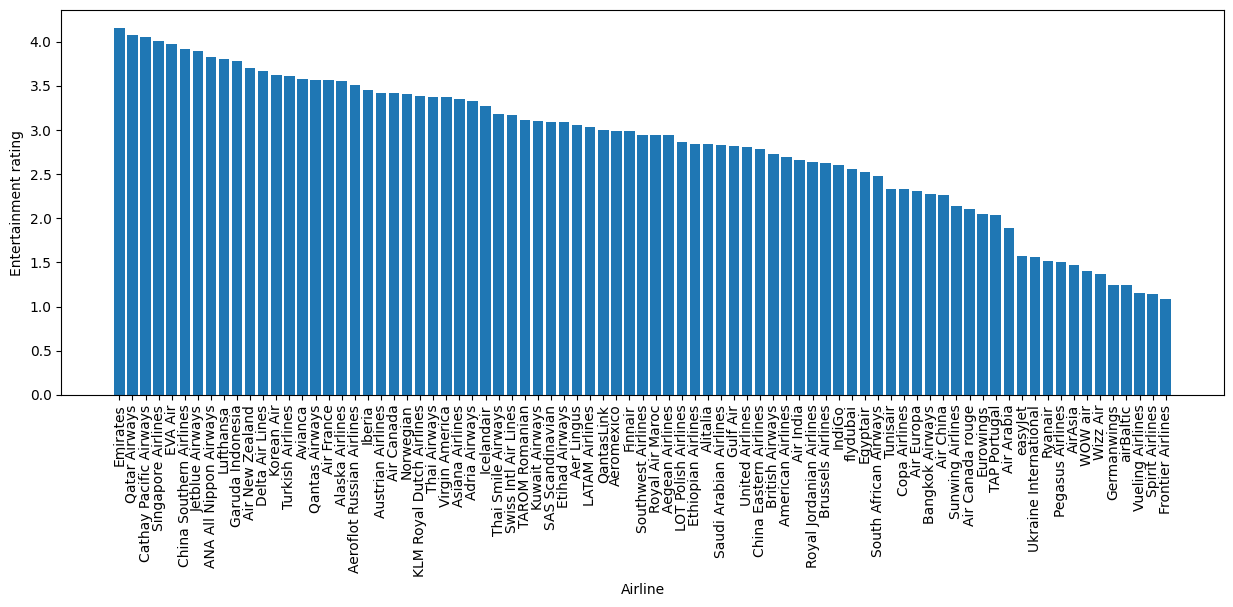

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize = (15, 5))
entertainment_df = df.groupby("airline")["entertainment"].mean().sort_values(ascending = False).reset_index()
plt.bar(entertainment_df["airline"], entertainment_df["entertainment"])
plt.xticks(rotation = 90)
plt.xlabel("Airline")
plt.ylabel("Entertainment rating")
plt.show()

##### 1. Why did you pick the specific chart?

Picked this chart to plot which airline gives what quality of entertainment.

##### 2. What is/are the insight(s) found from the chart?

Emirates, Qatar Airways and Cathay Pacific Airways have the highest rated entertainment, while Vueling, Spirit and Frontier Airlines have the lowest rated entertainment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights will help the respective airlines improve their entertainment rating.

#### Chart - 8

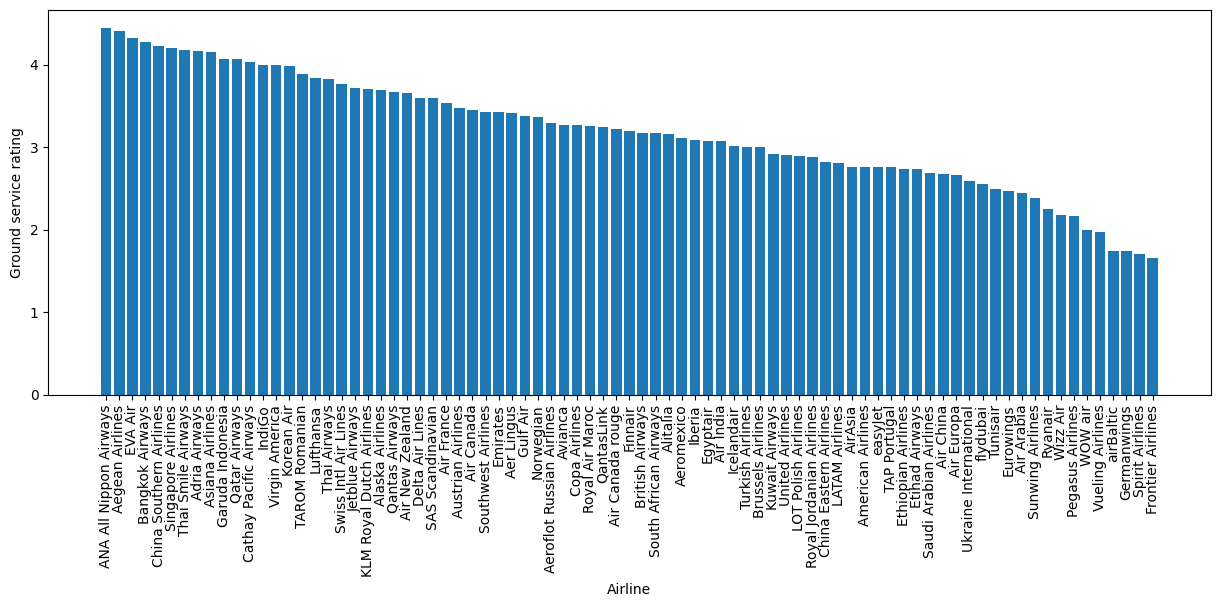

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize = (15, 5))
ground_service_df = df.groupby("airline")["ground_service"].mean().sort_values(ascending = False).reset_index()
plt.bar(ground_service_df["airline"], ground_service_df["ground_service"])
plt.xticks(rotation = 90)
plt.xlabel("Airline")
plt.ylabel("Ground service rating")
plt.show()

##### 1. Why did you pick the specific chart?

Picked this specific chart to plot which airline gives what level of ground service, as rated by the passengers.

##### 2. What is/are the insight(s) found from the chart?

ANA All Nippon Airways, Aegean Airlines, EVA Air have the highest rated ground service rating, while German, Spirit and Frontier Airlines have the lowest rated ground service.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights will help the respective airlines improve their ground service rating or maintain it if it is already good.

#### Chart - 9

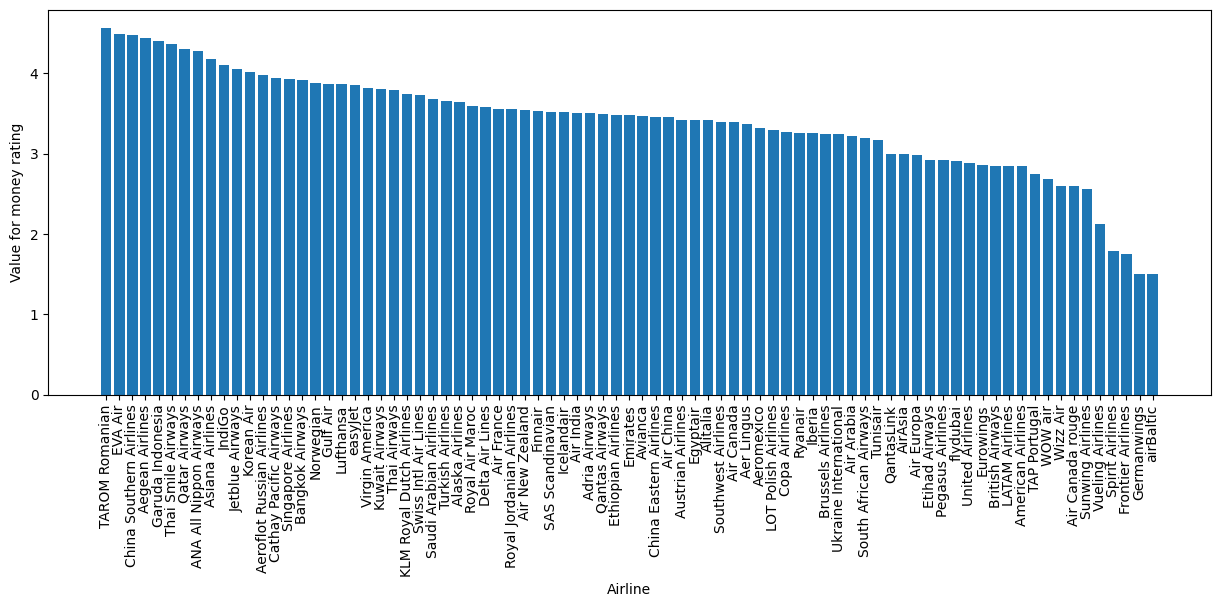

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize = (15, 5))
value_for_money_df = df.groupby("airline")["value_for_money"].mean().sort_values(ascending = False).reset_index()
plt.bar(value_for_money_df["airline"], value_for_money_df["value_for_money"])
plt.xticks(rotation = 90)
plt.xlabel("Airline")
plt.ylabel("Value for money rating")
plt.show()

##### 1. Why did you pick the specific chart?

Picked this chart to make a comparative bar graph of which airlines are highest and lowest rated for value for money aspect.

##### 2. What is/are the insight(s) found from the chart?

TAROM, EVA and China Southern Airlines have the highest rating for value for money, while Frontier, Germanwings and Baltic airlines have the lowest rating for value for money.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights will help the respective airlines keep up or improve their value for money rating.

#### Chart - 10 - Correlation Heatmap

<Axes: >

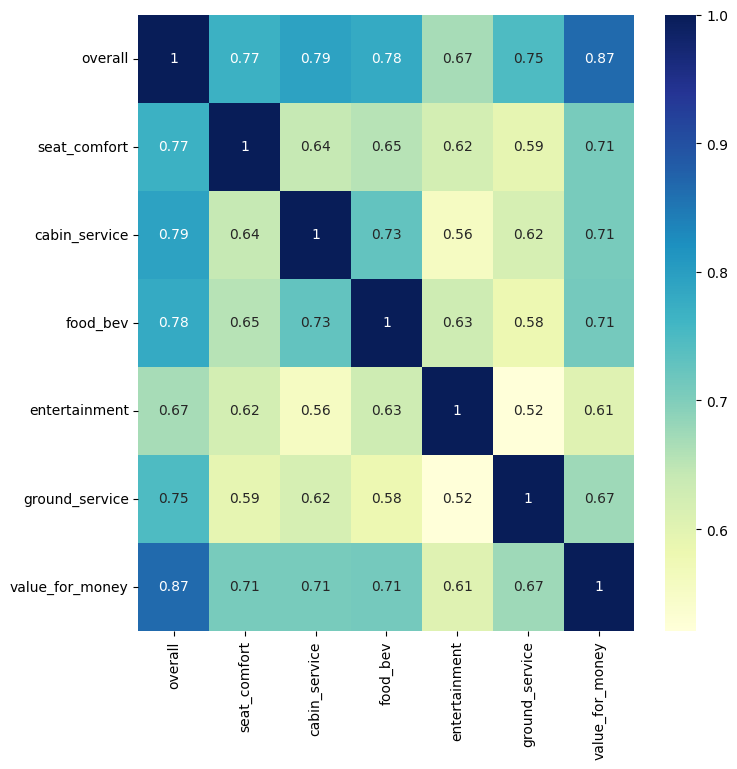

In [ ]:
# Correlation Heatmap visualization code
df.head()
df_small = df[["airline", "overall", "seat_comfort", "cabin_service", "food_bev", "entertainment", "ground_service", "value_for_money"]]
df_corr = df_small.iloc[:, 1:].corr()
plt.figure(figsize = (8, 8))
sns.heatmap(df_corr, cmap="YlGnBu", annot = True)

##### 1. Why did you pick the specific chart?

Picked this chart to see correlation heatmap among numerical columns.

##### 2. What is/are the insight(s) found from the chart?

Since, they are all ratings, they are highly correlated as it is based upon the sentiment formed from the experience of travelling on those airlines.

#### Chart - 11 - Pair Plot

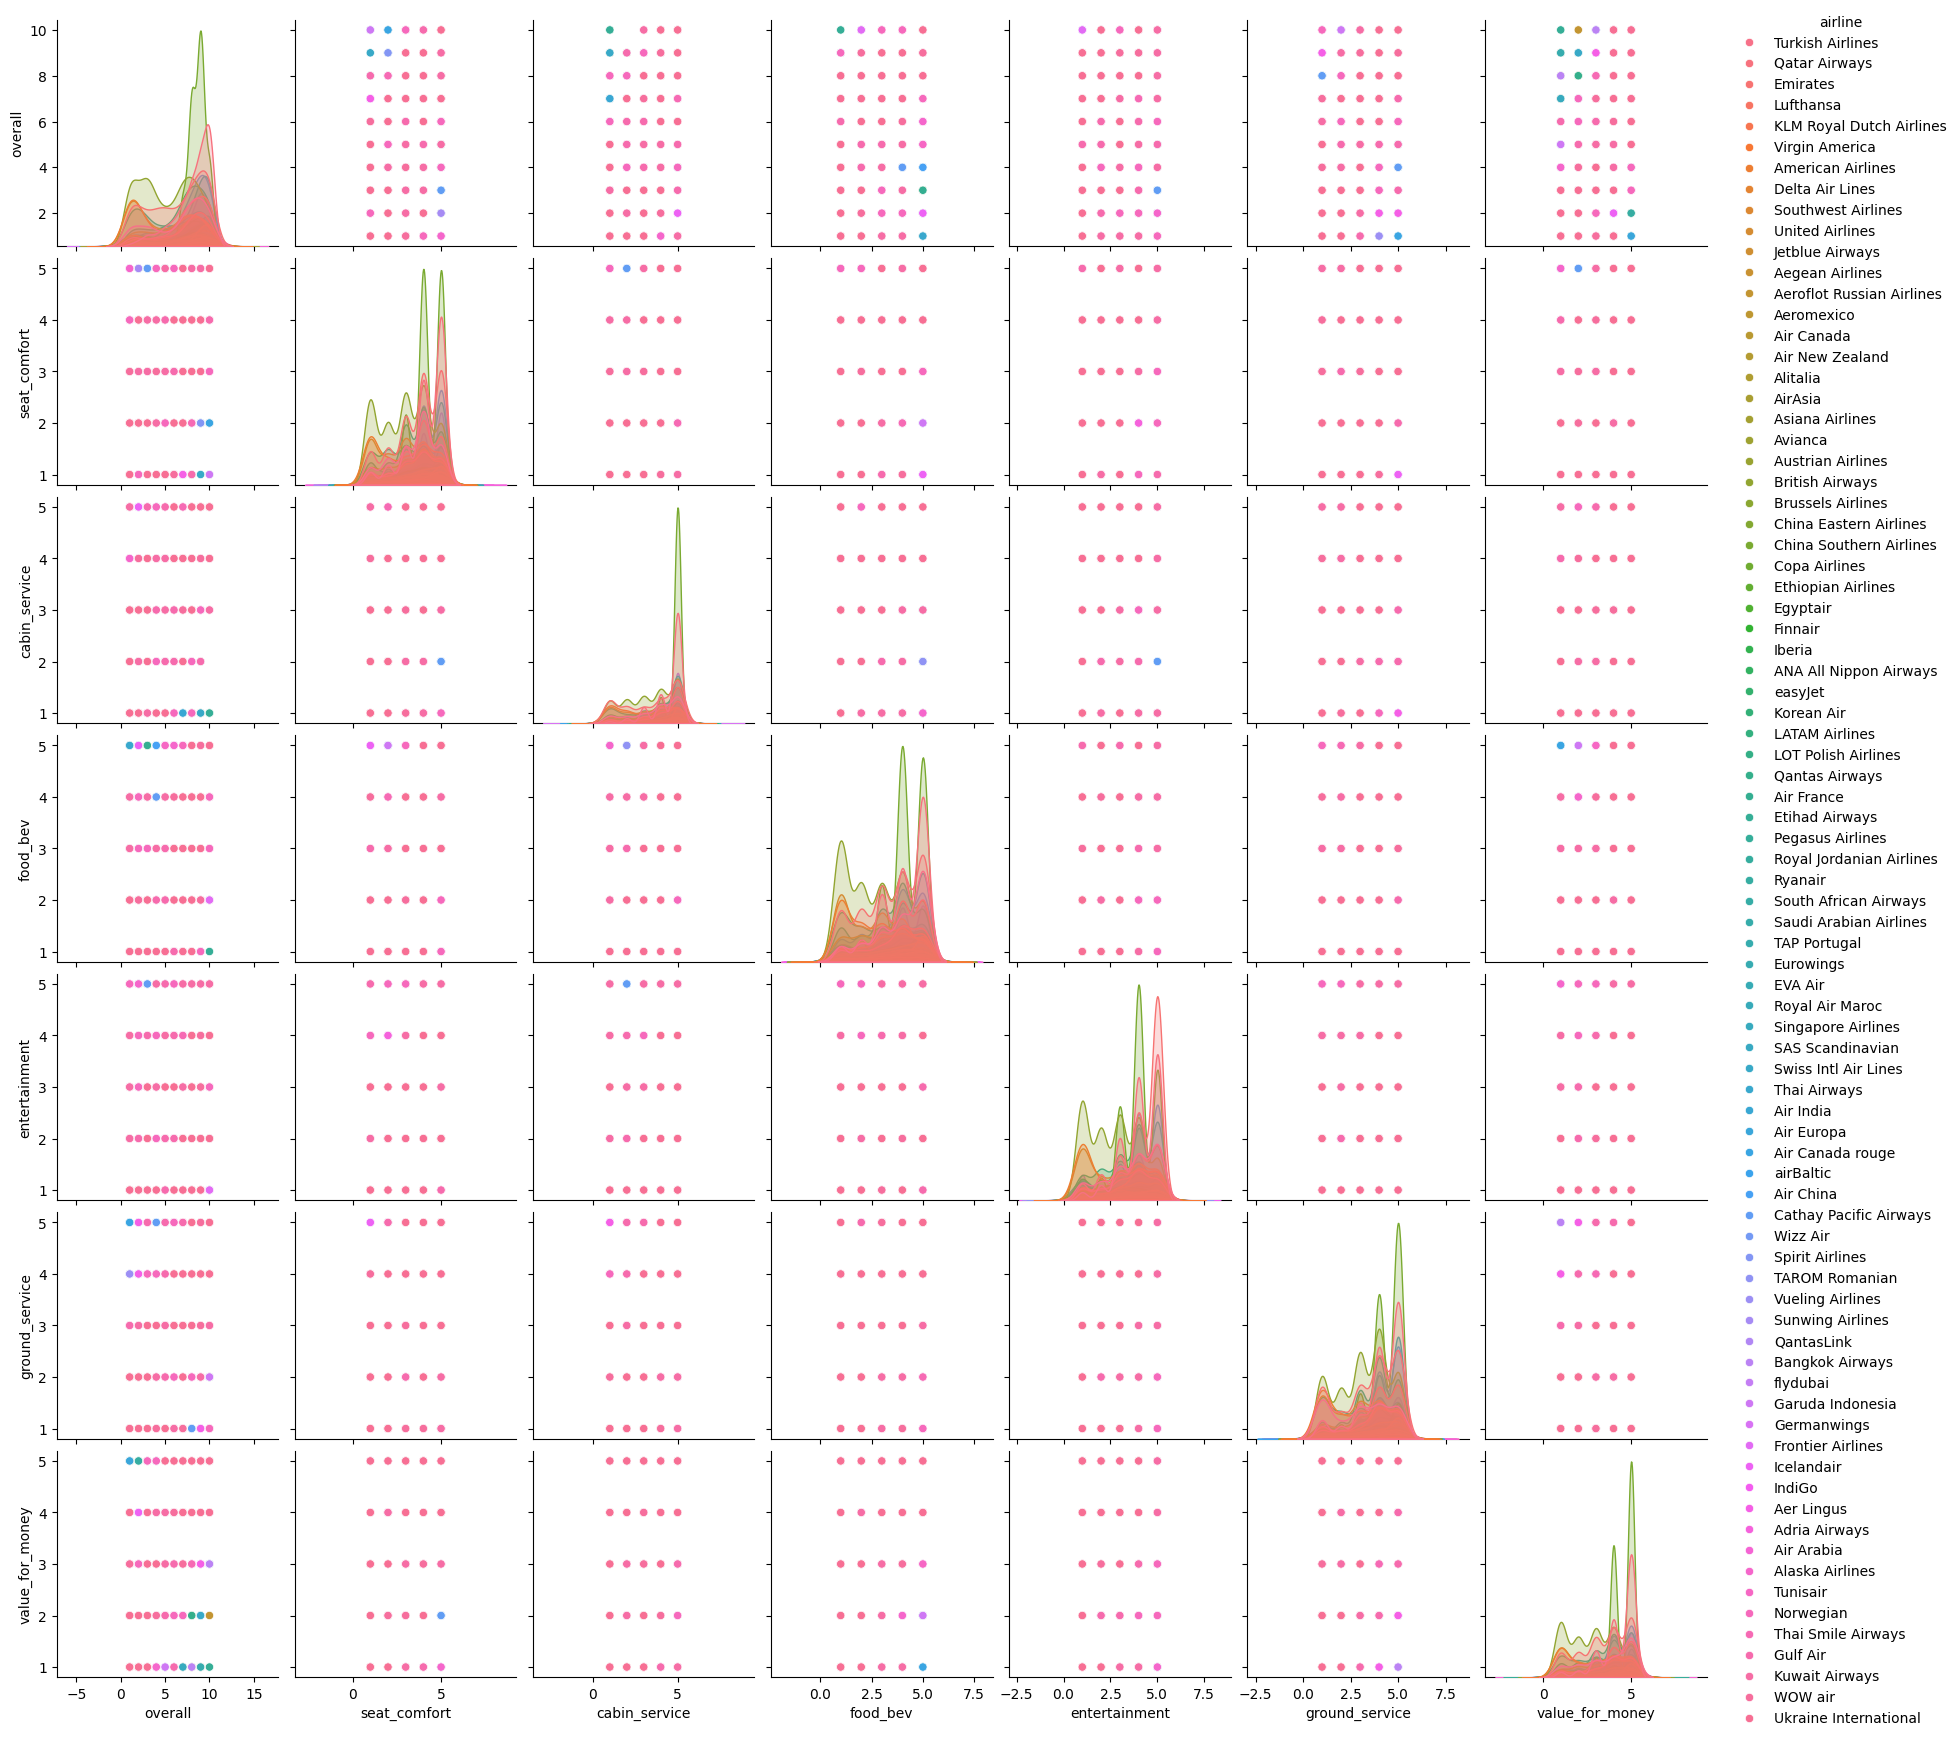

In [ ]:
# Pair Plot visualization code
sns.pairplot(df_small, hue = "airline")

##### 1. Why did you pick the specific chart?

Picked this chart to create pair plot of the numerical columns.

##### 2. What is/are the insight(s) found from the chart?

From the pair plot chart we can see which columns are mostly correlated. And it seems to be the numerical columns of ratings.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypotheses : Mean overall rating of a sample of 30 observations is less than the population mean of overall rating.

Alternative Hypotheses : Mean overall rating of a sample of 30 observations follows the population mean of overall rating.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_1samp
population = df["overall"]
population_mean = np.mean(population)
print("Population mean = ", population_mean)
sample = population.sample(n = 30)
print("Total number of samples = ", sample.shape)
sample_mean = np.mean(sample)
print("Sample mean = ", sample_mean)
t_test, p_val = ttest_1samp(sample, population_mean)
print("P-value = ", p_val)
if p_val < 0.05:
  print("Reject the null hypothesis. Therefore, mean overall rating is less than 6.49.")
else:
  print("Accept the null hypothesis. Therefore, mean overall rating is 6.49.")

Population mean =  6.494048070361665
Total number of samples =  (30,)
Sample mean =  7.133333333333334
P-value =  0.22317649157651492
Accept the null hypothesis. Therefore, mean overall rating is 6.49.


##### Which statistical test have you done to obtain P-Value?

We have done one sample t-test.

##### Why did you choose the specific statistical test?

We chose the specific statistical test because we want to compare the sample mean with population mean for one column.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypotheses : Mean value_for_money rating of a sample of 30 observations is less than the population mean of value_for_money rating.

Alternative Hypotheses : Mean value_for_money rating of a sample of 30 observations follows the population mean of value_for_money rating.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_1samp
population = df["value_for_money"]
population_mean = np.mean(population)
print("Population mean = ", population_mean)
sample = population.sample(n = 30)
print("Total number of samples = ", sample.shape)
sample_mean = np.mean(sample)
print("Sample mean = ", sample_mean)
t_test, p_val = ttest_1samp(sample, population_mean)
print("P-value = ", p_val)
if p_val < 0.05:
  print("Reject the null hypothesis. Therefore, mean overall rating is less than 6.49.")
else:
  print("Accept the null hypothesis. Therefore, mean overall rating is 6.49.")

Population mean =  3.5650921222230645
Total number of samples =  (30,)
Sample mean =  3.2
P-value =  0.2230552277051313
Accept the null hypothesis. Therefore, mean overall rating is 6.49.


##### Which statistical test have you done to obtain P-Value?

We have done one sample t-test.

##### Why did you choose the specific statistical test?

We chose the specific statistical test because we want to compare the sample mean with population mean for one column.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis : Cabin service and Ground service ratings have identical averages.

Alternative hypothesis : Cabin service and Ground service rating do not have identical averages.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind
population1 = df["cabin_service"]
population2 = df["ground_service"]

sample1 = population1.sample(n = 30)
sample2 = population2.sample(n = 30)
t_test, p_val = ttest_ind(sample1, sample2)
print("P-value = ", p_val)

if p_val < 0.05:
    print("We can reject the null hypothesis. Thus, they do not have identical averages.")
else:
    print("We can accept the null hypothesis. Thus, they have identical averages.")

P-value =  1.0
We can accept the null hypothesis. Thus, they have identical averages.


##### Which statistical test have you done to obtain P-Value?

We have done two sample t-test.

##### Why did you choose the specific statistical test?

We chose this specific statistical test, because we had to compare sample averages of two different columns.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
#already done above

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have removed the missing values and null values, because for imputing them we cannot add anything, as ratings are fluctuative and not predictive by nature.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
#no outliers as all rating are within a certain range 1-10 or 1-5

##### What all outlier treatment techniques have you used and why did you use those techniques?

There are no outliers affecting the data hence we haven't removed outliers.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["recommended"] = encoder.fit_transform(df["recommended"])

#### What all categorical encoding techniques have you used & why did you use those techniques?

We have used Label Encoding for recommended column as it was in binary "Yes" and "No" format. We have encoded "Yes" to numerical 1 and "No" to numerical 0.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
sentiment_df = df[["customer_review", "recommended"]]

import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer

nltk.download('all')




[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [ ]:
# create preprocess_text function
def preprocess_text(text):

    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

# apply the function df
sentiment_df['customer_review'] = sentiment_df['customer_review'].apply(preprocess_text)

<ipython-input-106-5a3cb8f3bf99>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['customer_review'] = sentiment_df['customer_review'].apply(preprocess_text)


In [ ]:
analyzer = SentimentIntensityAnalyzer()


# create get_sentiment function

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0
    return sentiment

# apply get_sentiment function

sentiment_df['sentiment'] = sentiment_df['customer_review'].apply(get_sentiment)

sentiment_df

<ipython-input-107-5373c063d18c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['sentiment'] = sentiment_df['customer_review'].apply(get_sentiment)


,customer_review,recommended,sentiment
7,âœ… trip verified | flew turkish airline iad-i...,1,1
15,âœ… trip verified | basel cape town via istanb...,0,0
17,verified | abu dhabi luxembourg via istanbul ....,1,1
19,âœ… trip verified | experience turkish airline...,0,1
29,âœ… trip verified | houston kiev via istanbul ...,0,1
...,...,...,...
131676,ukraine international n't everyone . right com...,1,1
131680,"warsaw kiev plane time , kiev airport pretty n...",1,1
131696,never flying discourage anyone thinking . fami...,0,1
131702,clean comfortable cabin . offered option upgra...,1,1


## ***7. ML Model Implementation***

In [ ]:
X = df[["overall", "seat_comfort", "cabin_service", "food_bev", "entertainment", "ground_service", "value_for_money"]]
X["sentiment"] = sentiment_df["sentiment"]
y = df[["recommended"]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

<ipython-input-117-0bf3d78d82b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["sentiment"] = sentiment_df["sentiment"]


### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators = 100)

# Fit the Algorithm
model1.fit(X_train, y_train)

# Predict on the model
y_pred1 = model1.predict(X_test)

<ipython-input-128-956b506c0a77>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(X_train, y_train)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy = ", accuracy)
precision = precision_score(y_test, y_pred1)
print("Precision = ", precision)
recall = recall_score(y_test, y_pred1)
print("Recall = ", recall)
roc_auc = roc_auc_score(y_test, y_pred1)
print("ROC AUC Score = ", roc_auc)

Accuracy =  0.9461713419257013
Precision =  0.9555680539932508
Recall =  0.9642451759364359
ROC AUC Score =  0.9370312637673047


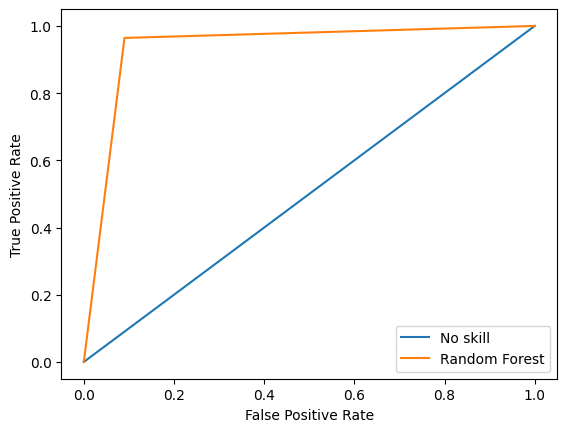

In [ ]:
normal = [0 for _ in range(len(y_test))]
fpr0, tpr0, _0 = roc_curve(y_test, normal)
fpr, tpr, _ = roc_curve(y_test, y_pred1)
plt.plot(fpr0, tpr0, label = "No skill")
plt.plot(fpr, tpr, label = "Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4]
}
grid_search = GridSearchCV(model1, param_grid, cv = 5)
# Fit the Algorithm
grid_search.fit(X_train, y_train)
# Predict on the model
best_params = grid_search.best_params_
print("Best parameters = ", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Best parameters =  {'max_depth': 5, 'min_samples_split': 4}


In [ ]:
model_best1 = RandomForestClassifier(n_estimators = 100, max_depth = 5, min_samples_split = 4)

# Fit the Algorithm
model_best1.fit(X_train, y_train)

# Predict on the model
y_pred_best1 = model_best1.predict(X_test)
precision = precision_score(y_test, y_pred_best1)
print("Precision = ", precision)

<ipython-input-133-03b7063a883c>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_best1.fit(X_train, y_train)


Precision =  0.9649122807017544


##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, improvement can be seen using the best params, precision score increases from 0.9555 to 0.9649.

### ML Model - 2

In [ ]:
# ML Model - 2 Implementation
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(C = 0.1)

# Fit the Algorithm
model2.fit(X_train, y_train)

# Predict on the model
y_pred2 = model2.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy = ", accuracy)
precision = precision_score(y_test, y_pred2)
print("Precision = ", precision)
recall = recall_score(y_test, y_pred2)
print("Recall = ", recall)
roc_auc = roc_auc_score(y_test, y_pred2)
print("ROC AUC Score = ", roc_auc)

Accuracy =  0.9548900682335102
Precision =  0.961257720381808
Recall =  0.9716231555051078
ROC AUC Score =  0.9464280161087183


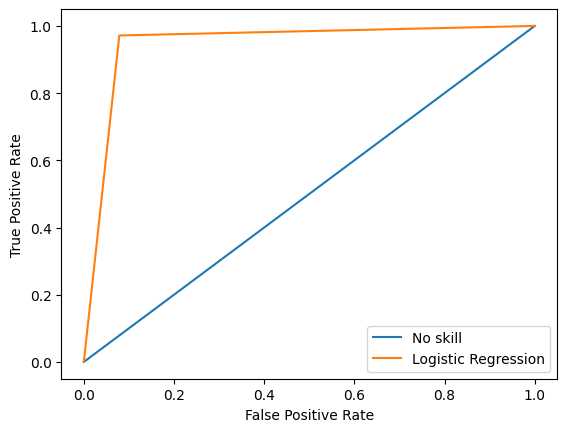

In [ ]:
normal = [0 for _ in range(len(y_test))]
fpr0, tpr0, _0 = roc_curve(y_test, normal)
fpr, tpr, _ = roc_curve(y_test, y_pred2)
plt.plot(fpr0, tpr0, label = "No skill")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import RandomizedSearchCV
param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
random_search = RandomizedSearchCV(model2, param_grid, cv = 5)

# Fit the Algorithm
random_search.fit(X_train, y_train)

# Predict on the model
best_params = random_search.best_params_
print("Best parameters = ", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = colu

Best parameters =  {'C': 1}


##### Which hyperparameter optimization technique have you used and why?

We have optimized the learning rate hyperparameter, because it is the one directly affecting LogisticRegression

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The best params of the RandomSearchCV or GridSearchCV gives the best precision score, as illustrated before.

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

For rare cancer data modeling, anything that doesn't account for false-negatives is a crime. Recall is a better measure than precision.

For YouTube recommendations, false-negatives is less of a concern. Precision is better here.

These two examples illustrate the evaluation metric's importance at different cases and circumstances.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()

# Fit the Algorithm
model3.fit(X_train, y_train)

# Predict on the model
y_pred3 = model3.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy = ", accuracy)
precision = precision_score(y_test, y_pred3)
print("Precision = ", precision)
recall = recall_score(y_test, y_pred3)
print("Recall = ", recall)
roc_auc = roc_auc_score(y_test, y_pred3)
print("ROC AUC Score = ", roc_auc)

Accuracy =  0.9499620924943138
Precision =  0.9558165548098434
Recall =  0.9699205448354143
ROC AUC Score =  0.9398689482167939


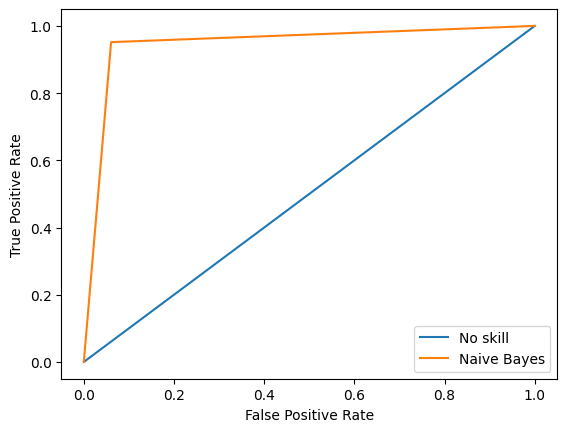

In [ ]:
normal = [0 for _ in range(len(y_test))]
fpr0, tpr0, _0 = roc_curve(y_test, normal)
fpr, tpr, _ = roc_curve(y_test, y_pred3)
plt.plot(fpr0, tpr0, label = "No skill")
plt.plot(fpr, tpr, label = "Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_search = GridSearchCV(model3, param_grid, cv = 5)

# Fit the Algorithm
grid_search.fit(X_train, y_train)

# Predict on the model
best_params = grid_search.best_params_
print("Best parameters = ", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best parameters =  {'var_smoothing': 0.3511191734215131}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV has been used, because it tries all combination of hyperparameters before outputting the best one.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
model3 = GaussianNB(var_smoothing = 0.3511191734215131)

# Fit the Algorithm
model3.fit(X_train, y_train)

# Predict on the model
y_pred3 = model3.predict(X_test)
precision = precision_score(y_test, y_pred3)
print("Improved precision = ", precision)

Improved precision =  0.9558165548098434


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performance increases with best params.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The evaluation metrics I have used are precision_score, recall_score, roc_auc_score and roc_curve, because these are the most important ones for evaluating model performance.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The model that I chose from the above created models as my final prediction model is LogisticRegression as it give the highest value of evaluation metrics.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**


*   The dataset was very good but it had some null values and missing values, which rows needed to be removed.
*   There were no outliers as all the ratings fell within a certain range.
*   We did some EDA to see which airlines had what kind of rating on various subjects.
*   Then we trained 3 different ML models, trained and predicted using them.
*   We found out the evaluation metrics of each model.
*   Then we improved the models using Cross Validations, and Hyperparameter Tuning.
*   Out of RandomForest, LogisticRegression and Naive Bayes, the model which performed the best was LogisticRegression.
*   Although all models did do a good enough job.









### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***